In [11]:
import warnings
warnings.filterwarnings("ignore")
from run import main
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

In [12]:
# set up dataframe for collecting event data
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
"""
SIM_TIME = 10000
scheme = 'randomly'
time_network, adversary = main(finish_time=SIM_TIME, scheme=scheme)

Adversary: Start SCAN_HOST at 0.0s.
MTD: HostTopologyShuffle triggered 0.0s
MTD: HostTopologyShuffle deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 10.0s.
Adversary: Start ENUM_HOST at 10.0s.
Adversary: Processed ENUM_HOST at 25.0s.
Adversary: Start SCAN_PORT at 25.0s.
MTD: HostTopologyShuffle finished in 40.6s at 40.6s.
MTD: Interrupted SCAN_PORT at 40.6s!
Adversary: Restarting with SCAN_HOST at 42.6s!
Adversary: Start SCAN_HOST at 42.6s.
Adversary: Processed SCAN_HOST at 52.6s.
Adversary: Start ENUM_HOST at 52.6s.
MTD: UserShuffle triggered 60.2s
MTD: UserShuffle deployed in the network at 60.2s.
Adversary: Processed ENUM_HOST at 67.6s.
Adversary: Start SCAN_PORT at 67.6s.
Adversary: Processed SCAN_PORT at 87.6s.
Adversary: Start EXPLOIT_VULN at 87.6s.
MTD: UserShuffle finished in 40.6s at 100.8s.
Adversary: Processed EXPLOIT_VULN at 112.9s.
Adversary: Host 0 has been compromised at 112.9s!
Adversary: Start SCAN_NEIGHBOR at 112.9s.
MTD: CompleteTopologyShuffle tri

In [13]:
mtd_operation_record = pd.DataFrame(time_network.get_mtd_stats().get_record())
attack_operation_record = pd.DataFrame(adversary.get_attack_stats().get_record())
current_directory = os.getcwd()
if not os.path.exists(current_directory+'\\data_analysis'):
    os.makedirs(current_directory+'\\data_analysis')

attack_operation_record.to_csv('data_analysis/attack_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv', index=False)

In [14]:
# print(time_network.get_mtd_stats().dict())
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at,batch_register_number
0,HostTopologyShuffle,0.000000,40.592059,40.592059,network,1
1,UserShuffle,60.201317,100.791165,40.589848,reserve,1
2,CompleteTopologyShuffle,120.538622,160.721954,40.183333,network,1
3,IPShuffle,181.509390,221.741842,40.232451,network,1
4,osdiversity,242.402780,283.124488,40.721708,application,1


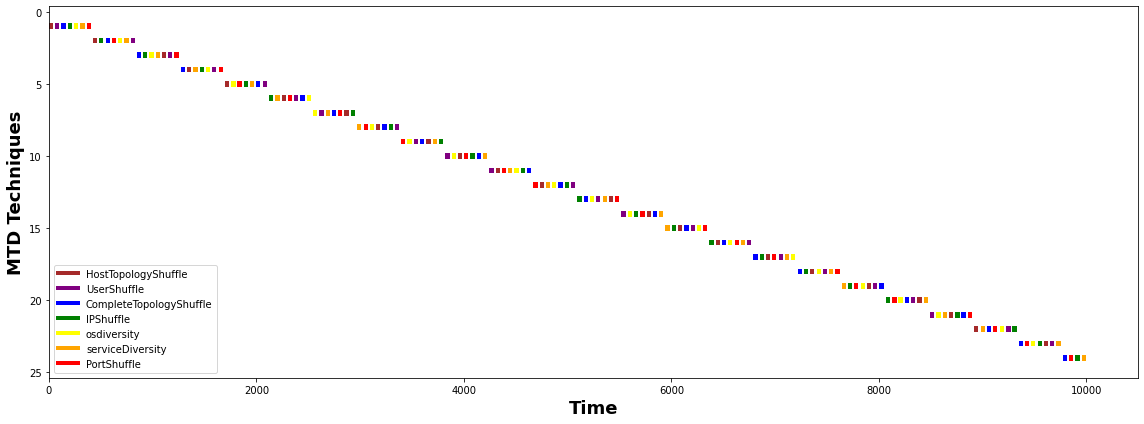

In [15]:
fig, ax = plt.subplots(1, figsize=(16, 6))

colors = ['brown', 'purple', 'blue', 'green', 'yellow', 'orange', 'red']
mtd_action_legend = []
mtd_action_legend_name = []
for i, v in enumerate(mtd_operation_record['name'].unique()):
    mtd_operation_record.loc[mtd_operation_record.name == v, 'color'] = colors[i]
    mtd_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    mtd_action_legend_name.append(v)

ax.barh(mtd_operation_record['batch_register_number'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.4, color=mtd_operation_record['color'] )
ax.legend(mtd_action_legend, mtd_action_legend_name, loc='lower left')
plt.gca().invert_yaxis()

# ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


# custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='orange', lw=4)]
# ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [16]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,40.592059,15.592059,0,1,0,0,None,[],network,HostTopologyShuffle
3,SCAN_HOST,42.592059,52.592059,10.000000,-1,0,0,0,None,[],None,None
4,ENUM_HOST,52.592059,67.592059,15.000000,-1,0,0,0,None,[],None,None


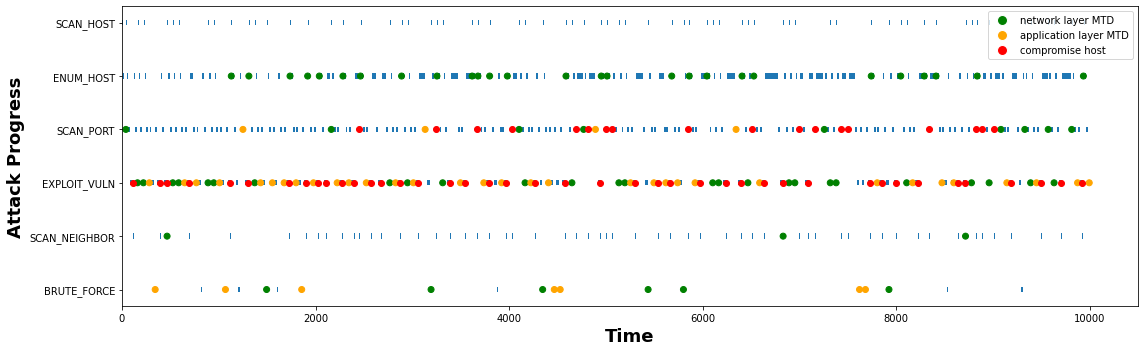

In [17]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax2.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=2)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax2.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax2.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [18]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
149,SCAN_PORT,2433.986533,2453.986533,20.0,48,1,266,12,48,"[Letty, Berry]",None,None
199,SCAN_PORT,3220.519200,3240.519200,20.0,37,4,312,17,37,"[Teresita, Gus]",None,None
228,SCAN_PORT,3645.224412,3665.224412,20.0,52,1,336,20,52,"[Lelia, Barbey, Kessiah, Suellen]",None,None
253,SCAN_PORT,4008.506135,4028.506135,20.0,42,1,345,23,42,"[Melicent, Cindelyn]",None,None
294,SCAN_PORT,4675.776285,4695.776285,20.0,56,2,369,26,56,"[Maritsa, Issie, Kay]",None,None
303,SCAN_PORT,4796.815045,4816.815045,20.0,33,3,369,27,33,[Estrella],None,None
316,SCAN_PORT,4978.886075,4998.886075,20.0,27,1,375,29,27,[Mada],None,None
321,SCAN_PORT,5038.374384,5058.374384,20.0,53,3,375,30,53,[Mil],None,None
371,SCAN_PORT,5827.936326,5847.936326,20.0,25,6,417,34,25,"[Agathe, Ronny]",None,None
416,SCAN_PORT,6493.846023,6513.846023,20.0,38,7,469,38,38,[Rosabelle],None,None


In [19]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
6,EXPLOIT_VULN,87.592059,112.905361,25.313303,0,2,0,0,0,"[Emlyn, Elyssa, Carmina, Ricki, Nari]",None,None
23,EXPLOIT_VULN,365.348196,391.275300,25.927104,35,2,39,1,35,"[Misty, George, Bee, Shara, Brinna]",None,None
27,EXPLOIT_VULN,436.275300,461.336595,25.061295,39,1,55,2,39,"[Katalin, Shelly, Kaia, Violet, Modesta]",None,None
42,EXPLOIT_VULN,669.689138,696.129069,26.439931,54,1,85,3,54,"[Taryn, Georgia, Aleece, Demetris, Rosmunda]",None,None
66,EXPLOIT_VULN,1091.380716,1117.019812,25.639096,28,1,148,4,28,"[Cacilia, Katherina, Merrill, Clementine, Leah]",None,None
77,EXPLOIT_VULN,1272.063362,1297.160503,25.097142,23,1,176,5,23,"[Lydia, Willamina, Ginevra, Sarette]",None,None
102,EXPLOIT_VULN,1697.551032,1723.484248,25.933216,23,3,201,6,23,"[Romola, Noella, Vinnie, Ronalda]",None,None
113,EXPLOIT_VULN,1879.127218,1904.646071,25.518853,22,2,209,7,22,"[Kellie, Dorree, Talyah, Biddie]",None,None
121,EXPLOIT_VULN,2000.833568,2026.315570,25.482003,32,1,211,8,32,"[Kailey, Dionis, Rhetta, Didi]",None,None
127,EXPLOIT_VULN,2085.985863,2111.233019,25.247156,53,1,245,9,53,"[Robinet, Galina, Dorella, Floria]",None,None


In [20]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
